In [1]:
%ls

'#logistic-regression-numpy.ipynb'*   file.d*
'Classifying non linear data.ipynb'   file.db*
 Dockerfile*                          lib/
 MLP.ipynb                            models/
 ModelGraph.html                      neural_net/
'OLS with tf.ipynb'*                  pure_numpy_clean.ipynb*
 Test.ipynb                           pure_numpy_clean.py*
 active_funcs.ipynb                   readme.md*
 autodiff_reverse_mode.jpeg*          tf_logs/
 data/


In [2]:
import neural_net

# Initialization

## Linear Layer

In [3]:
 fc = neural_net.layers.fullyconnected(n_in=2,n_out=6)

In [4]:
str(fc)

'fullyconnected'

In [5]:
fc.id

{'id': 140481858776272,
 'type': 'fullyconnected',
 'self': <neural_net.layers.fullyconnected at 0x7fc47b4a2cd0>,
 'n_in': 2,
 'n_out': 6,
 'init_method': <function neural_net.init_funcs.zeros(n_in, n_out=None, k=1)>}

In [6]:
fc.outfuncs

## Linear neuron

In [7]:
linear_neuron = fc.outfuncs[0]
linear_neuron

In [8]:
str(linear_neuron)

'Linear'

In [9]:
linear_neuron.id

{'id': 140481858772752,
 'type': 'Linear',
 'self': <neural_net.activation_funcs.Σ at 0x7fc47b4a1f10>,
 'layer': {'id': 140481858776272,
  'type': 'fullyconnected',
  'self': <neural_net.layers.fullyconnected at 0x7fc47b4a2cd0>,
  'n_in': 2,
  'n_out': 6,
  'init_method': <function neural_net.init_funcs.zeros(n_in, n_out=None, k=1)>}}

In [10]:
linear_neuron.w.shape

(3, 1)

## activation layer

In [11]:
al = neural_net.layers.activation(n_in=6,func=neural_net.activation_funcs.σ)

In [12]:
al.outfuncs

In [13]:
str(al)

'activation'

## sigmoid neuron

In [14]:
sigmoid = al.outfuncs[0]
sigmoid

In [15]:
str(sigmoid)

'sigmoid'

In [16]:
sigmoid.id

{'id': 140482003907152,
 'type': 'sigmoid',
 'self': <neural_net.activation_funcs.σ at 0x7fc483f0b250>,
 'layer': {'id': 140482670892560,
  'type': 'activation',
  'self': <neural_net.layers.activation at 0x7fc4abb21610>,
  'n_in': 6,
  'func': neural_net.activation_funcs.σ,
  'n_out': 6},
 'cost_func': neural_net.loss.binaryCrossEntropy}

## Architecture

In [17]:
network = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=10),
        neural_net.layers.activation(n_in=10,func=neural_net.activation_funcs.σ),
        neural_net.layers.fullyconnected(n_in=10,n_out=1),
        neural_net.layers.activation(n_in=1,func=neural_net.activation_funcs.σ)
        ]
    )

In [18]:
network.steps

In [19]:
network.steps

## db

In [20]:
neural_net.db.DBmanager.con

In [21]:
cursor = neural_net.db.DBmanager.con.cursor()

In [22]:
import pandas
res = cursor.execute('''

        SELECT * 
        FROM
        sqlite_schema

''')
pandas.DataFrame(res.fetchall())

/tmp/ipykernel_6546/1787835217.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


,0,1,2,3,4
0,table,Neurons,Neurons,2,CREATE TABLE Neurons(\n id INTEGER PRIMARY KE...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,Layers,Layers,4,CREATE TABLE Layers(\n id INTEGER PRIMARY KEY...
3,table,Weights,Weights,5,CREATE TABLE Weights(\n id INTEGER PRIMARY KE...


# Predicting

In [23]:
import numpy
X = numpy.random.uniform(size=(100,2))

## Linear Layer

In [24]:
network.steps[0]

### Feeding input

In [25]:
network.steps[0].In = [(id(X),X)]

In [26]:
network.steps[0].In

{140481821949072: array([[0.61183204, 0.25864146],
        [0.00427055, 0.7219295 ],
        [0.98715005, 0.07457472],
        [0.55221021, 0.51684309],
        [0.51030022, 0.30104994],
        [0.00670302, 0.79974036],
        [0.92691262, 0.99204894],
        [0.89263346, 0.47152836],
        [0.72429403, 0.2922354 ],
        [0.008886  , 0.9296316 ],
        [0.98984043, 0.83212944],
        [0.61929516, 0.30886565],
        [0.48874785, 0.84772457],
        [0.57869179, 0.38103997],
        [0.6044169 , 0.26634335],
        [0.56172201, 0.85787071],
        [0.43807505, 0.79229658],
        [0.94977077, 0.46881518],
        [0.31494937, 0.00588117],
        [0.84557269, 0.77619113],
        [0.67117513, 0.83323653],
        [0.48472175, 0.22201346],
        [0.07239986, 0.42543849],
        [0.45046313, 0.34770211],
        [0.33832241, 0.09270656],
        [0.79190069, 0.76892296],
        [0.25344568, 0.17712872],
        [0.84142719, 0.03073598],
        [0.47323836, 0.92586002

In [27]:
network.steps[0].outfuncs

In [28]:
network.steps[0].outfuncs[0]

In [29]:
network.steps[0].outfuncs[0].In

((140481821949072,),
 array([[0.61183204, 0.25864146],
        [0.00427055, 0.7219295 ],
        [0.98715005, 0.07457472],
        [0.55221021, 0.51684309],
        [0.51030022, 0.30104994],
        [0.00670302, 0.79974036],
        [0.92691262, 0.99204894],
        [0.89263346, 0.47152836],
        [0.72429403, 0.2922354 ],
        [0.008886  , 0.9296316 ],
        [0.98984043, 0.83212944],
        [0.61929516, 0.30886565],
        [0.48874785, 0.84772457],
        [0.57869179, 0.38103997],
        [0.6044169 , 0.26634335],
        [0.56172201, 0.85787071],
        [0.43807505, 0.79229658],
        [0.94977077, 0.46881518],
        [0.31494937, 0.00588117],
        [0.84557269, 0.77619113],
        [0.67117513, 0.83323653],
        [0.48472175, 0.22201346],
        [0.07239986, 0.42543849],
        [0.45046313, 0.34770211],
        [0.33832241, 0.09270656],
        [0.79190069, 0.76892296],
        [0.25344568, 0.17712872],
        [0.84142719, 0.03073598],
        [0.47323836, 0.9258

### Db layers

In [30]:
res = cursor.execute('''

        SELECT * 
        FROM
        layers

''')
pandas.DataFrame(res.fetchall())

,0,1,2,3,4,5
0,1,140482671005328,10,2024-02-20 23:38:12,2024-02-20 23:38:12,fullyconnected


### Neurons

In [31]:
res = cursor.execute('''

        SELECT * 
        FROM
        neurons

''')
pandas.DataFrame(res.fetchall())

,0,1,2,3,4,5
0,1,140481858948624,140482671005328,2024-02-20 23:38:12,2024-02-20 23:38:12,Linear
1,2,140481858913488,140482671005328,2024-02-20 23:38:12,2024-02-20 23:38:12,Linear
2,3,140482611820368,140482671005328,2024-02-20 23:38:12,2024-02-20 23:38:12,Linear
3,4,140481859035600,140482671005328,2024-02-20 23:38:12,2024-02-20 23:38:12,Linear
4,5,140481859035472,140482671005328,2024-02-20 23:38:12,2024-02-20 23:38:12,Linear
5,6,140481859035984,140482671005328,2024-02-20 23:38:13,2024-02-20 23:38:13,Linear
6,7,140481859036048,140482671005328,2024-02-20 23:38:13,2024-02-20 23:38:13,Linear
7,8,140481859036112,140482671005328,2024-02-20 23:38:13,2024-02-20 23:38:13,Linear
8,9,140481859036176,140482671005328,2024-02-20 23:38:13,2024-02-20 23:38:13,Linear
9,10,140481859035920,140482671005328,2024-02-20 23:38:13,2024-02-20 23:38:13,Linear


### Weights

In [32]:
res = cursor.execute('''

        SELECT * 
        FROM
        weights

''')
pandas.DataFrame(res.fetchall())

,0,1,2,3,4,5
0,1,0,140481858948624,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
1,2,1,140481858948624,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
2,3,2,140481858948624,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
3,4,0,140481858913488,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
4,5,1,140481858913488,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
5,6,2,140481858913488,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
6,7,0,140482611820368,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
7,8,1,140482611820368,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
8,9,2,140482611820368,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
9,10,0,140481859035600,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0


### Predictions

In [33]:
len(network.steps[0].eval())

10

In [34]:
network.steps[0].out[0][1].shape

(100, 1)

## Activation Layer

In [35]:
network.steps[1].In = network.steps[0].out

In [36]:
len(network.steps[1].In)

10

In [37]:
network.steps[1].outfuncs

In [38]:
network.steps[1].outfuncs[0]

In [39]:
network.steps[1].outfuncs[0].In

(140481822145008,
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

In [40]:
network.steps[1].outfuncs[0].In[1].shape

(100, 1)

In [41]:
len(network.steps[1])

10

In [42]:
len(network.steps[1].eval())

10

In [43]:
network.steps[1].outfuncs

In [44]:
network.steps[1].outfuncs[0].eval()

(140481858761040,
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
       

In [45]:
len(network.steps[1].out)

10

## Second Linear Layer

In [46]:
network.steps[2].In = network.steps[1].out

In [47]:
len(network.steps[2].In)

10

In [48]:
network.steps[2].outfuncs

In [49]:
res = cursor.execute('''

        SELECT * 
        FROM
        weights

''')
pandas.DataFrame(res.fetchall())

,0,1,2,3,4,5
0,1,0,140481858948624,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
1,2,1,140481858948624,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
2,3,2,140481858948624,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
3,4,0,140481858913488,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
4,5,1,140481858913488,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
5,6,2,140481858913488,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
6,7,0,140482611820368,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
7,8,1,140482611820368,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
8,9,2,140482611820368,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0
9,10,0,140481859035600,2024-02-20 23:38:12,2024-02-20 23:38:12,0.0


In [50]:
network.steps[2].outfuncs[0].In[1].shape

(100, 10)

In [51]:
len(network.steps[2].eval())

1

## Output Layer

In [52]:
network.steps[3].In = network.steps[2].out

In [53]:
network.steps[3].eval()

[(140481822316784,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

## Predict Method

In [54]:
network.predict(X)

[(140481858760752,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

# Visualizing Network

In [55]:
neural_net.	architecture.GraphManager

neural_net.utils.GraphManager

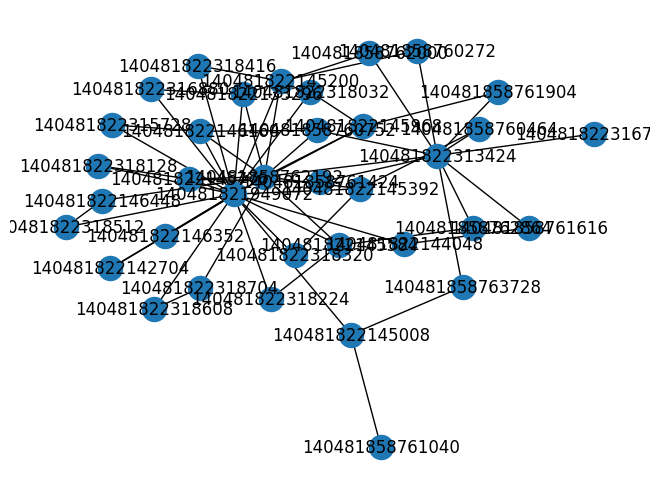

In [56]:
neural_net.	architecture.GraphManager.draw()

In [57]:
neural_net.	architecture.GraphManager.draw(engine='pyviz',params={'notebook':True})

ModelGraph.html
